## Importing Dataset (Optional)

This is only for downloading the data from kaggle. You can obtain it however you wish, just have it as .csv files with their original names, all placed in the root folder of the repository. For the method below, you need an API key saved (in Windows: C:\Users\<Windows-username>\.kaggle\kaggle.json): please refer to [relevant Kaggle link](https://www.kaggle.com/docs/api#interacting-with-datasets) for more info.

In [3]:
import kaggle, zipfile
!kaggle datasets download mrmorj/fraud-detection-in-electricity-and-gas-consumption

Dataset URL: https://www.kaggle.com/datasets/mrmorj/fraud-detection-in-electricity-and-gas-consumption
License(s): other




  0%|          | 0.00/87.2M [00:00<?, ?B/s]
  1%|1         | 1.00M/87.2M [00:00<00:48, 1.85MB/s]
  3%|3         | 3.00M/87.2M [00:00<00:17, 5.17MB/s]
  7%|6         | 6.00M/87.2M [00:00<00:08, 9.67MB/s]
  9%|9         | 8.00M/87.2M [00:01<00:07, 10.4MB/s]
 11%|#1        | 10.0M/87.2M [00:01<00:06, 12.3MB/s]
 14%|#3        | 12.0M/87.2M [00:01<00:05, 14.1MB/s]
 16%|#6        | 14.0M/87.2M [00:01<00:05, 14.6MB/s]
 18%|#8        | 16.0M/87.2M [00:01<00:04, 15.2MB/s]
 21%|##        | 18.0M/87.2M [00:01<00:04, 15.0MB/s]
 23%|##2       | 20.0M/87.2M [00:01<00:04, 15.1MB/s]
 25%|##5       | 22.0M/87.2M [00:01<00:04, 16.3MB/s]
 28%|##7       | 24.0M/87.2M [00:02<00:03, 17.2MB/s]
 30%|##9       | 26.0M/87.2M [00:02<00:03, 17.5MB/s]
 32%|###2      | 28.0M/87.2M [00:02<00:03, 17.8MB/s]
 34%|###4      | 30.0M/87.2M [00:02<00:03, 16.6MB/s]
 37%|###6      | 32.0M/87.2M [00:02<00:03, 16.7MB/s]
 40%|####      | 35.0M/87.2M [00:02<00:02, 18.5MB/s]
 42%|####2     | 37.0M/87.2M [00:02<00:02, 17.6MB/s]
 

In [4]:
# Unzip the data files (~480MB total).
f_path = './fraud-detection-in-electricity-and-gas-consumption.zip'

with zipfile.ZipFile(f_path, 'r') as zip_file:
    zip_file.extractall('./')

## Exploring Data

Import packages needed to explore and modify the data

In [5]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [6]:
# Read the CSV files
df_client_test = pd.read_csv('./client_test.csv', on_bad_lines='skip')
df_client_train = pd.read_csv('./client_train.csv', on_bad_lines='skip')
df_invoice_test = pd.read_csv('./invoice_test.csv', on_bad_lines='skip')
# low_memory is prompted due to unexpected values and large datasize
df_invoice_train = pd.read_csv('./invoice_train.csv', on_bad_lines='skip', low_memory=False)
df_SampleSubmission = pd.read_csv('./SampleSubmission (2).csv', on_bad_lines='skip')

In [7]:
df_SampleSubmission.head()

,client_id,target
0,test_Client_0,0.957281
1,test_Client_1,0.996425
2,test_Client_10,0.612359
3,test_Client_100,0.776933
4,test_Client_1000,0.571046


Conclusion: df_SampleSubmission is not relevant for this project; it is expected format for evaluating performance on Kaggle.

In [9]:
df_client_test.head()

,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004
3,60,test_Client_100,11,101,08/10/1992
4,62,test_Client_1000,11,301,21/07/1977


In [10]:
df_invoice_test.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC


In [11]:
print(f"Number of rows in client train vs invoice train: {len(df_client_train)} vs {len(df_invoice_train)}")
print(f"Number of rows in client test vs invoice test: {len(df_client_test)} vs {len(df_invoice_test)}", end="")

Number of rows in client train vs invoice train: 135493 vs 4476749
Number of rows in client test vs invoice test: 58069 vs 1939730

Conclusion: This was done for data normalisation. Not too interested in that, going to merge them.

In [12]:
df_train = df_invoice_train.join(df_client_train.set_index('client_id'), on='client_id', validate='m:1')
df_train

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,...,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date,target
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,...,0,14302,14384,4,ELEC,60,11,101,31/12/1994,0.0
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,...,0,12294,13678,4,ELEC,60,11,101,31/12/1994,0.0
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,...,0,14624,14747,4,ELEC,60,11,101,31/12/1994,0.0
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,...,0,14747,14849,4,ELEC,60,11,101,31/12/1994,0.0
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,...,0,15066,15638,12,ELEC,60,11,101,31/12/1994,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,train_Client_99998,2005-08-19,10,1253571,0,202,9,1,400,135,...,0,3197,3732,8,ELEC,60,11,101,22/12/1993,0.0
4476745,train_Client_99998,2005-12-19,10,1253571,0,202,6,1,200,6,...,0,3732,3938,4,ELEC,60,11,101,22/12/1993,0.0
4476746,train_Client_99999,1996-09-25,11,560948,0,203,6,1,259,0,...,0,13884,14143,4,ELEC,60,11,101,18/02/1986,0.0
4476747,train_Client_99999,1996-05-28,11,560948,0,203,6,1,603,0,...,0,13281,13884,4,ELEC,60,11,101,18/02/1986,0.0


In [13]:
df_test = df_invoice_test.join(df_client_test.set_index('client_id'), on='client_id', validate='m:1')
df_test

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC,62,11,307,28/05/2002
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC,62,11,307,28/05/2002
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC,62,11,307,28/05/2002
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC,62,11,307,28/05/2002
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC,62,11,307,28/05/2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939725,test_Client_9999,2010-03-11,11,869269,0,203,6,1,248,0,0,0,21114,21362,4,ELEC,69,11,104,14/03/1990
1939726,test_Client_9999,2011-03-15,11,869269,0,203,6,1,260,0,0,0,21362,21622,4,ELEC,69,11,104,14/03/1990
1939727,test_Client_9999,2012-12-03,11,869269,0,203,6,1,312,0,0,0,22272,22584,4,ELEC,69,11,104,14/03/1990
1939728,test_Client_9999,2009-07-01,11,869269,0,203,6,1,236,0,0,0,19909,20145,4,ELEC,69,11,104,14/03/1990


In [14]:
del df_invoice_train, df_invoice_test, df_client_train, df_client_test

Would like to condense the data a bit. There are some comments from the source regarding the meaning of these columns. These included here verbatim.

"client_train.csv":

"disrict: District where the client is"

"client_id: Unique id for client"

"client_catg: Category client belongs to"

"region: Area where the client is"

"creation_date: Date client joined"

"target: fraud:1, not fraud: 0"

"invoice_train.csv":

"client_id: Unique id for client"

"invoice_date: Date of the invoice"

"tarif_type: Type of tax"

"counter_number: number"

"counter_statue: akes up to 5 values such as working fine, not working, on hold statue, ect"

"counter_code: code"

"reading_remarque: notes that the STEG agent takes during his visit to the cleint (e.g.: if the counter shows something wrong, the"

"counter_coefficient: An additional coefficient to be added when standard consumption is exceeded"

"consommation_level_1: Consumption_level_1"

"consommation_level_2: Consumption_level_2"

"consommation_level_3: Consumption_level_3"

"consommation_level_4: Consumption_level_4"

"old_index: Old index"

"new_index: New index"

"months_number: Month number"

"counter_type: Type of counter"

In [15]:
df_train.dtypes

client_id                object
invoice_date             object
tarif_type                int64
counter_number            int64
counter_statue           object
counter_code              int64
reading_remarque          int64
counter_coefficient       int64
consommation_level_1      int64
consommation_level_2      int64
consommation_level_3      int64
consommation_level_4      int64
old_index                 int64
new_index                 int64
months_number             int64
counter_type             object
disrict                   int64
client_catg               int64
region                    int64
creation_date            object
target                  float64
dtype: object

Converting data types where appropriate:

In [16]:
# invoice_date: object -> date [YYYY-MM-DD] -> [YYYY-MM-DD]
df_train['invoice_date'] = pd.to_datetime(df_train['invoice_date'])
# creation_date: object -> date [DD/MM/YYYY] -> [YYYY-MM-DD]
df_train['creation_date'] = pd.to_datetime(df_train['creation_date'], dayfirst=True)

Looking at the others:

In [17]:
# Looking at unique values for the columns (but skipping the dates)
col_names = df_train.columns
col_names = [col_name for col_name in col_names if 'date' not in col_name]

for col_name in col_names:
    print(f"Column name: {col_name}, Unique Values: {df_train[col_name].unique()}")

Column name: client_id, Unique Values: ['train_Client_0' 'train_Client_1' 'train_Client_10' ...
 'train_Client_99997' 'train_Client_99998' 'train_Client_99999']
Column name: tarif_type, Unique Values: [11 40 15 10 12 14 13 45 29  9 30  8 21 42 27 18 24]
Column name: counter_number, Unique Values: [1335667  678902  572765 ... 4811719  262195  560948]
Column name: counter_statue, Unique Values: ['0' '1' '5' '4' '3' '2' '769' 'A' '618' '269375' '46' '420']
Column name: counter_code, Unique Values: [203 207 413   5 467 202 420 410  10 483  25 433 407 204 214 442 453 506
 450 403 333 201 102 305 210 101 532  40 310 565 600 307 303 222  65   0
 227 325  16 317 367   1]
Column name: reading_remarque, Unique Values: [  8   6   9   7 207 413 203   5]
Column name: counter_coefficient, Unique Values: [ 1  3  0 10  4 33 50 20  2  6 40  9 30  5 11  8]
Column name: consommation_level_1, Unique Values: [   82  1200   123 ... 43053  4824  8314]
Column name: consommation_level_2, Unique Values: [    0 

Several of these seem they can be treated as categories for space saving

In [18]:
# The following columns:
# tarif_type, counter_statue, counter_code, reading_remarque, counter_coefficient, counter_type, disrict, client_catg, region
# all seem very repetitive and are going to be treated as categories.
col_names = ['tarif_type', 'counter_statue', 'counter_code', 'reading_remarque', 'counter_coefficient', 'counter_type', 'disrict', 'client_catg', 'region']
for col_name in col_names:
    df_train[col_name] = df_train[col_name].astype("category")

Going to rename the columns slightly.

In [55]:
df_train.columns = ['client_id', 'invoice_date', 'tariff_type', 'mtr_num',
                    'mtr_status', 'mtr_code', 'reading_remarks',
                    'mtr_coef', 'usage_lev_1', 'usage_lev_2',
                    'usage_lev_3', 'usage_lev_4', 'old_idx',
                    'new_idx', 'months_num', 'counter_type', 'district', 'client_type',
                    'region', 'creation_date', 'target']

In [56]:
df_train.describe()

,invoice_date,mtr_num,usage_lev_1,usage_lev_2,usage_lev_3,usage_lev_4,old_idx,new_idx,months_num,creation_date,target
count,4476749,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4476749,4.476749e+06
mean,2013-03-18 07:42:34.444128768,1.230587e+11,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01,1999-08-12 05:59:55.845735424,7.887688e-02
min,1977-06-09 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1977-02-05 00:00:00,0.000000e+00
25%,2010-01-19 00:00:00,1.211080e+05,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00,1991-03-05 00:00:00,0.000000e+00
50%,2013-07-10 00:00:00,4.945610e+05,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00,2001-06-22 00:00:00,0.000000e+00
75%,2016-09-03 00:00:00,1.115161e+06,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00,2008-06-04 00:00:00,0.000000e+00
max,2019-12-07 00:00:00,2.798115e+13,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05,2019-09-10 00:00:00,1.000000e+00
std,NaN,1.657267e+12,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03,NaN,2.695465e-01


In [57]:
df_train['months_num']

0           4
1           4
2           4
3           4
4          12
           ..
4476744     8
4476745     4
4476746     4
4476747     4
4476748     4
Name: months_num, Length: 4476749, dtype: int64

In [30]:
print(f"Months Number: Min: {df_train['months_num'].min()}, Max: {df_train['months_num'].max()}", end="")

Months Number: Min: 0, Max: 636624

In [31]:
df_train['months_num'].value_counts()

months_number
4         3680478
8          278772
2          270909
1          113266
12          54328
           ...   
378671          1
374707          1
454440          1
370510          1
3311            1
Name: count, Length: 1370, dtype: int64

In [34]:
df_train['months_num'][df_train['months_num'] > 12].value_counts()

months_number
16        11550
20         3850
14         2154
24         1558
18          749
          ...  
378671        1
374707        1
454440        1
370510        1
3311          1
Name: count, Length: 1357, dtype: int64

(array([13950.,  4991.,  1759.,   830.,   421.,   378.,   100.,    65.,
           49.,    34.]),
 array([13. , 17.6, 22.2, 26.8, 31.4, 36. , 40.6, 45.2, 49.8, 54.4, 59. ]),
 <BarContainer object of 10 artists>)

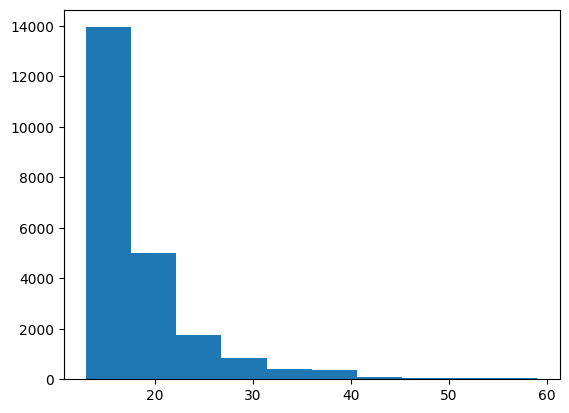

In [43]:
plt.pyplot.hist(df_train['months_num'][(df_train['months_num'] > 12) & (df_train['months_num'] < 60)])

In [48]:
# Testing to see if it is related to count of months they've been customer
((df_train['invoice_date'].dt.year - df_train['creation_date'].dt.year) * 12) + (df_train['invoice_date'].dt.month - df_train['creation_date'].dt.month)

0          231
1          219
2          243
3          247
4          263
          ... 
4476744    140
4476745    144
4476746    127
4476747    123
4476748    119
Length: 4476749, dtype: int32

In [49]:
df_train['months_num']

0           4
1           4
2           4
3           4
4          12
           ..
4476744     8
4476745     4
4476746     4
4476747     4
4476748     4
Name: months_number, Length: 4476749, dtype: int64

It's is really unclear what months_num is meant to represent...

It is similarly unclear what "old_idx" and "new_idx" are meant to represent.

In [58]:
df_train.head()

,client_id,invoice_date,tariff_type,mtr_num,mtr_status,mtr_code,reading_remarks,mtr_coef,usage_lev_1,usage_lev_2,...,usage_lev_4,old_idx,new_idx,months_num,counter_type,district,client_type,region,creation_date,target
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,...,0,14302,14384,4,ELEC,60,11,101,1994-12-31,0.0
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,...,0,12294,13678,4,ELEC,60,11,101,1994-12-31,0.0
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,...,0,14624,14747,4,ELEC,60,11,101,1994-12-31,0.0
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,...,0,14747,14849,4,ELEC,60,11,101,1994-12-31,0.0
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,...,0,15066,15638,12,ELEC,60,11,101,1994-12-31,0.0


In [62]:
df_train[['usage_lev_1', 'usage_lev_2', 'usage_lev_3', 'usage_lev_4']].head()

,usage_lev_1,usage_lev_2,usage_lev_3,usage_lev_4
0,82,0,0,0
1,1200,184,0,0
2,123,0,0,0
3,102,0,0,0
4,572,0,0,0


(array([[4.476747e+06, 1.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 1.000000e+00],
        [4.476719e+06, 1.800000e+01, 8.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 2.000000e+00,
         1.000000e+00, 1.000000e+00],
        [4.476749e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [4.476723e+06, 2.300000e+01, 1.000000e+00, 1.000000e+00,
         0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00]]),
 array([     0.,  99991., 199982., 299973., 399964., 499955., 599946.,
        699937., 799928., 899919., 999910.]),
 <a list of 4 BarContainer objects>)

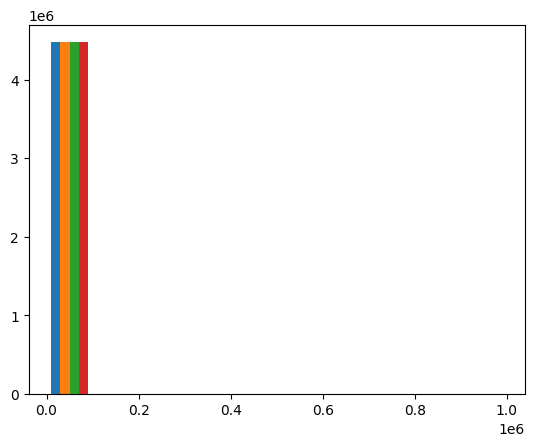

In [67]:
plt.pyplot.hist(df_train[['usage_lev_1', 'usage_lev_2', 'usage_lev_3', 'usage_lev_4']])

In [73]:
df_train['mtr_coef'][df_train['mtr_coef'] != 1]

149605      3
179746      0
179751      0
179755      0
296474     10
           ..
4476322     3
4476323     3
4476324     3
4476325     3
4476326     3
Name: mtr_coef, Length: 1647, dtype: category
Categories (16, int64): [0, 1, 2, 3, ..., 30, 33, 40, 50]

In [78]:
sum(df_train['usage_lev_4'][df_train['mtr_coef'] != 1])

2315016

In [125]:
col_names = ['mtr_coef', 'usage_lev_1', 'usage_lev_2', 'usage_lev_3', 'usage_lev_4', 'target', 'tariff_type', 'mtr_status']
df_temp = df_train[col_names]
df_temp[(df_temp['usage_lev_2'] > 0) | (df_temp['usage_lev_3'] > 0) | (df_temp['usage_lev_4'] > 0)]

,mtr_coef,usage_lev_1,usage_lev_2,usage_lev_3,usage_lev_4,target,tariff_type,mtr_status
1,1,1200,184,0,0,0.0,11,0
8,1,1200,186,0,0,0.0,11,0
75,1,2400,682,0,0,0.0,11,0
110,1,800,159,0,0,0.0,11,0
111,1,800,109,0,0,0.0,11,0
...,...,...,...,...,...,...,...,...
4476586,1,200,228,0,0,0.0,10,0
4476587,1,200,879,0,0,0.0,10,0
4476699,1,800,31,0,0,0.0,11,0
4476744,1,400,135,0,0,0.0,10,0


In [126]:
df_temp[df_temp['mtr_coef']  != 1]

,mtr_coef,usage_lev_1,usage_lev_2,usage_lev_3,usage_lev_4,target,tariff_type,mtr_status
149605,3,531,0,0,0,0.0,11,0
179746,0,0,0,0,0,0.0,8,0
179751,0,0,0,0,0,0.0,8,0
179755,0,0,0,0,0,0.0,8,0
296474,10,0,0,0,0,0.0,11,5
...,...,...,...,...,...,...,...,...
4476322,3,300,9699,0,0,0.0,11,0
4476323,3,300,29019,0,0,0.0,11,0
4476324,3,300,3798,0,0,0.0,11,0
4476325,3,1200,32001,0,0,0.0,11,0


There is no clear link between meter coefficient and usage level.

In [127]:
df_temp[(df_temp['usage_lev_3'] > 0) | (df_temp['usage_lev_4'] > 0)].head(60)

,mtr_coef,usage_lev_1,usage_lev_2,usage_lev_3,usage_lev_4,target,tariff_type,mtr_status
113,1,800,400,800,382,0.0,11,0
120,1,800,400,800,132,0.0,11,0
123,1,800,400,43,0,0.0,11,0
141,1,800,400,181,0,0.0,11,0
292,1,800,400,800,9153,0.0,11,0
293,1,800,400,800,15257,0.0,11,0
394,1,800,400,68,0,0.0,11,0
396,1,800,400,116,0,0.0,11,0
398,1,800,400,762,0,0.0,11,0
410,1,800,400,430,0,0.0,11,0


When L3 and L4 present, L2 seems to be (L1 / 2).

In [128]:
mask = (df_temp['usage_lev_3'] > 0)
df_temp['usage_lev_1'][mask][(df_temp['usage_lev_1'][mask] - (df_temp['usage_lev_2'][mask] * 2)) != 0].unique()

array([5, 1])

Looking at L3, that rule is only broken when L1 is 5 or 1. 

In [129]:
mask = (df_temp['usage_lev_4'] > 0)
df_temp[mask].head(60)

,mtr_coef,usage_lev_1,usage_lev_2,usage_lev_3,usage_lev_4,target,tariff_type,mtr_status
113,1,800,400,800,382,0.0,11,0
120,1,800,400,800,132,0.0,11,0
292,1,800,400,800,9153,0.0,11,0
293,1,800,400,800,15257,0.0,11,0
582,1,800,400,800,218,0.0,11,0
611,1,800,400,800,436,0.0,11,0
621,1,800,400,800,151,0.0,11,0
622,1,800,400,800,120,0.0,11,0
843,1,800,400,800,172,0.0,11,0
849,1,1600,800,1600,1340,0.0,11,0


seems incremental. I was thinking it could have been paired (for gas an electricity etc). Seems like L3 is twice L2 and same as L1.

Looks like the usage_levels spill over. L2 being half L1. L3 being equal to L1. L4 then being uncapped. Although this is broadly true, There are some unexpected L1 values where this is broken (L1 == 5 ! L1 == 1)

In [130]:
# Ignore temporarily usage_lev_1 == 1 or 5 since they seem weird
mask = (df_temp['usage_lev_1'] != 1) & (df_temp['usage_lev_1'] != 5)
df_temp[mask][(df_temp['usage_lev_1'][mask] < df_temp['usage_lev_3'][mask])]

,mtr_coef,usage_lev_1,usage_lev_2,usage_lev_3,usage_lev_4,target,tariff_type,mtr_status
311870,1,800,400,801,0,0.0,11,0
3144954,1,800,400,801,0,0.0,11,0
3759101,1,800,400,801,0,0.0,11,0
4103535,1,800,400,802,0,0.0,11,0
4170409,1,800,400,803,0,0.0,11,0
4413298,1,800,400,801,0,0.0,11,0


In [131]:
# Ignore temporarily usage_lev_1 == 1 or 5 since they seem weird
mask = (df_temp['usage_lev_1'] != 1) & (df_temp['usage_lev_1'] != 5)
df_temp[mask][(df_temp['usage_lev_1'][mask] < (df_temp['usage_lev_2'][mask] * 2))]

,mtr_coef,usage_lev_1,usage_lev_2,usage_lev_3,usage_lev_4,target,tariff_type,mtr_status
294,1,1200,5624,0,0,0.0,11,0
296,1,1200,1722,0,0,0.0,11,0
422,1,1200,827,0,0,0.0,11,0
496,1,800,403,0,0,0.0,11,0
598,1,1800,1950,0,0,0.0,11,1
...,...,...,...,...,...,...,...,...
4476579,1,200,564,0,0,0.0,10,0
4476581,1,200,730,0,0,0.0,10,0
4476583,1,200,346,0,0,0.0,10,0
4476586,1,200,228,0,0,0.0,10,0


In [135]:
print(df_temp['usage_lev_3'][mask][(df_temp['usage_lev_1'][mask] < (df_temp['usage_lev_2'][mask] * 2))].unique())
print(df_temp['usage_lev_4'][mask][(df_temp['usage_lev_1'][mask] < (df_temp['usage_lev_2'][mask] * 2))].unique())

[0]
[0]


L1 and L3 capping at same value seems very rarely broken, and does not seem associated with being fraud.

L2 cap exceeding 2 * L1 seems to happen too frequently to consider ignoring. But it only happens when not "spilling" into L3 and L4.

In [59]:
test = df_train['tarif_type'].astype("category")
#test.cat.categories
#pd.Categorical.from_codes(splitter, categories=tariff_codes)

Potentially, there is a meaninful scale here between 0 - 5, but it would be hard to know. Going to treat as categorical.

In [71]:
print(df_train['counter_number'].unique())

[1335667  678902  572765 ... 4811719  262195  560948]


In [50]:
# client_id: object -> factor
# counter_statue: why is that not an int64?
# counter_type: why is that not an int64?
# target: object -> factor


C:\Users\mhoss\AppData\Local\Temp\ipykernel_28632\2322047708.py:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(df_train['creation_date'])


0         1994-12-31
1         1994-12-31
2         1994-12-31
3         1994-12-31
4         1994-12-31
             ...    
4476744   1993-12-22
4476745   1993-12-22
4476746   1986-02-18
4476747   1986-02-18
4476748   1986-02-18
Name: creation_date, Length: 4476749, dtype: datetime64[ns]

In [45]:
df_train['counter_statue'].unique()

array(['0', '1', '5', '4', '3', '2', '769', 'A', '618', '269375', '46',
       '420'], dtype=object)

In [46]:
df_train['counter_type'].unique()

array(['ELEC', 'GAZ'], dtype=object)